In [1]:
from deep_dss.utils import *
from deep_dss.models import *

from deepsphere.plot import plot_loss

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbo

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]

def plot_metrics_axes(ax, loss_training, loss_validation, eval_frequency, t_step, target=0.04, title=""):
    x_steps = np.array([eval_frequency*i for i in range(len(loss_training))])
    ax2 = ax.secondary_xaxis('top', functions=(lambda x : t_step * x / 3600, lambda x: x * 3600 / t_step))
    ax2.set_xlabel("Training Time (hrs)")
    ax.set_yscale("log")
    ax.plot(x_steps, loss_training, '.-', label='training')
    ax.plot(x_steps, loss_validation, '.-', label='validation')
    ax.plot([0, np.max(x_steps)], [target, target], label='target')
    ax.set_xlim([0, np.max(x_steps)])
    ax.set_ylim([1e-2, 10])
    ax.set_yticks([1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 2, 5, 10])
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xlabel("Training Step")
    ax.set_ylabel("Average L1 Loss")
    ax.set_title(title)
    ax.grid()
    ax.legend()
    
def plot_metrics(exp_name, order=2, nmaps=10, batch_size=16):
    path_1 = np.load("../metrics/vdata1-{}-metrics-1.npz".format(exp_name))
    path_2 = np.load("../metrics/vdata1-{}-metrics-2.npz".format(exp_name))
    eval_frequency = 12*order*order*nmaps/batch_size
    t_step = path_1["t"]
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0] = plot_metrics_axes(axs[0], path_1["ltrain"], path_1["lval"], eval_frequency, t_step,
                              title="Training Metrics for {} on Noiseless Data".format(exp_name))
    axs[1] = plot_metrics_axes(axs[1], path_2["ltrain"], path_2["lval"], eval_frequency, t_step,  
                               title="Training Metrics for {} on Noisy Data".format(exp_name))
    print("Minimum Loss on Training Set During Noiseless Stage: {}".format(np.min(path_1["ltrain"])))
    print("Minimum Loss on Validation Set During Noiseless Stage: {}".format(np.min(path_1["lval"])))
    print("Minimum Loss on Training Set During Noisy Stage: {}".format(np.min(path_2["ltrain"])))
    print("Minimum Loss on Validation Set During Noisy Stage: {}".format(np.min(path_2["lval"])))
    print("Time per Training Step During Noiseless Stage: {} seconds".format(path_1["t"]))
    print("Time per Training Step During Noisy Stage: {} seconds".format(path_2["t"]))

Minimum Loss on Training Set During Noiseless Stage: 0.011647474020719528
Minimum Loss on Validation Set During Noiseless Stage: 0.024398157373070717
Minimum Loss on Training Set During Noisy Stage: 0.007418647408485413
Minimum Loss on Validation Set During Noisy Stage: 0.07254222594201565
Time per Training Step During Noiseless Stage: 43.95382819573084 seconds
Time per Training Step During Noisy Stage: 44.279929091268116 seconds


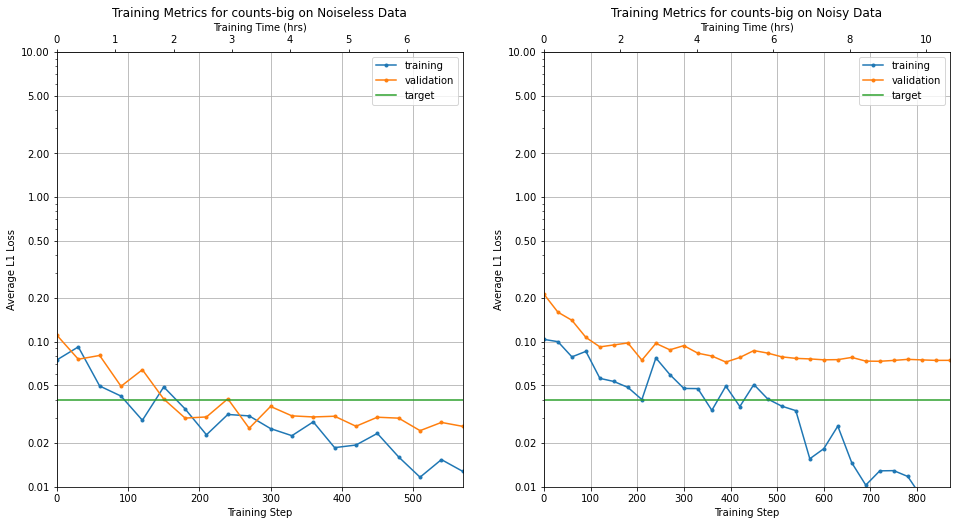

In [3]:
plot_metrics("counts-big")

Minimum Loss on Training Set During Noiseless Stage: 0.021325547248125076
Minimum Loss on Validation Set During Noiseless Stage: 5.399387836456299
Minimum Loss on Training Set During Noisy Stage: 0.05529889464378357
Minimum Loss on Validation Set During Noisy Stage: 0.18968240916728973
Time per Training Step During Noiseless Stage: 45.238330533107124 seconds
Time per Training Step During Noisy Stage: 47.21277985652288 seconds


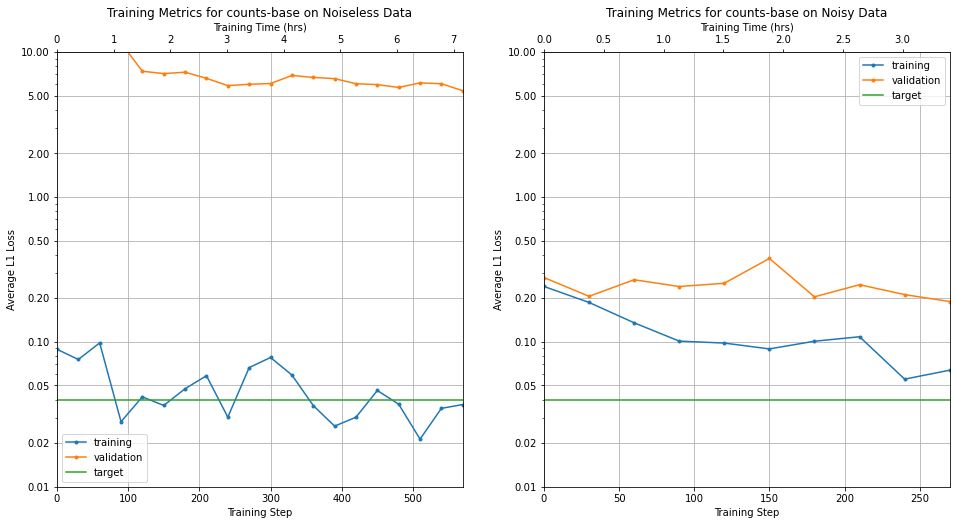

In [222]:
plot_metrics("counts-base")

Minimum Loss on Training Set During Noiseless Stage: 0.033966004848480225
Minimum Loss on Validation Set During Noiseless Stage: 0.40057724714279175
Minimum Loss on Training Set During Noisy Stage: 0.07441901415586472
Minimum Loss on Validation Set During Noisy Stage: 0.3225913941860199
Time per Training Step During Noiseless Stage: 58.67771373589834 seconds
Time per Training Step During Noisy Stage: 58.950272799332936 seconds


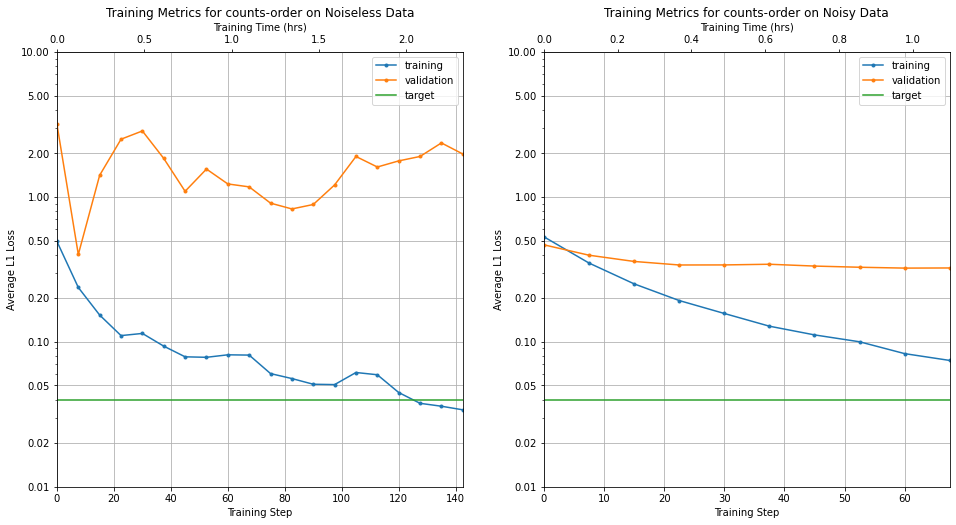

In [223]:
plot_metrics("counts-order", batch_size=64)

Minimum Loss on Training Set During Noiseless Stage: 0.027557533234357834
Minimum Loss on Validation Set During Noiseless Stage: 0.9494761228561401
Minimum Loss on Training Set During Noisy Stage: 0.16173219680786133
Minimum Loss on Validation Set During Noisy Stage: 0.27226418256759644
Time per Training Step During Noiseless Stage: 117.72580691258112 seconds
Time per Training Step During Noisy Stage: 116.49865822950999 seconds


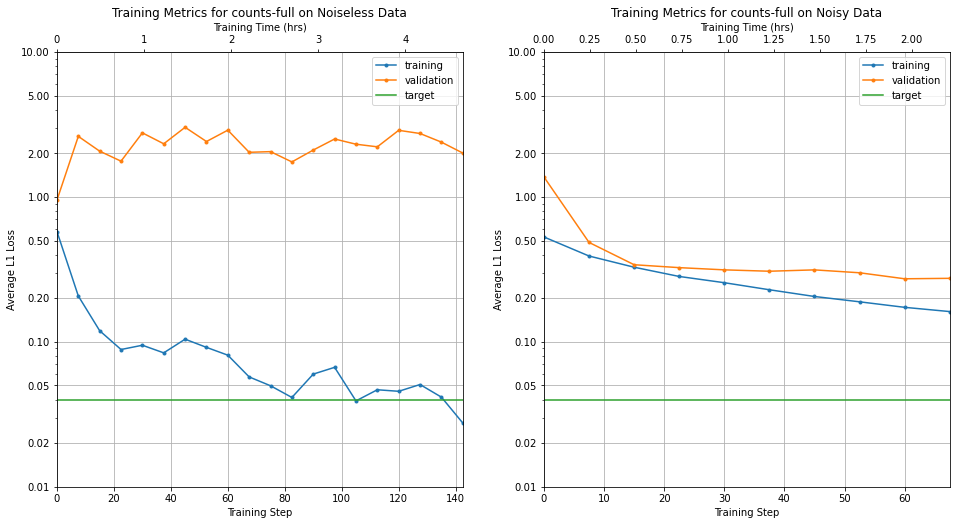

In [224]:
plot_metrics("counts-full", batch_size=64)

Minimum Loss on Training Set During Noiseless Stage: 0.03253520280122757
Minimum Loss on Validation Set During Noiseless Stage: 0.18191348016262054
Minimum Loss on Training Set During Noisy Stage: 0.0416327528655529
Minimum Loss on Validation Set During Noisy Stage: 0.13029903545975685
Time per Training Step During Noiseless Stage: 46.402980461915334 seconds
Time per Training Step During Noisy Stage: 47.513112494150796 seconds


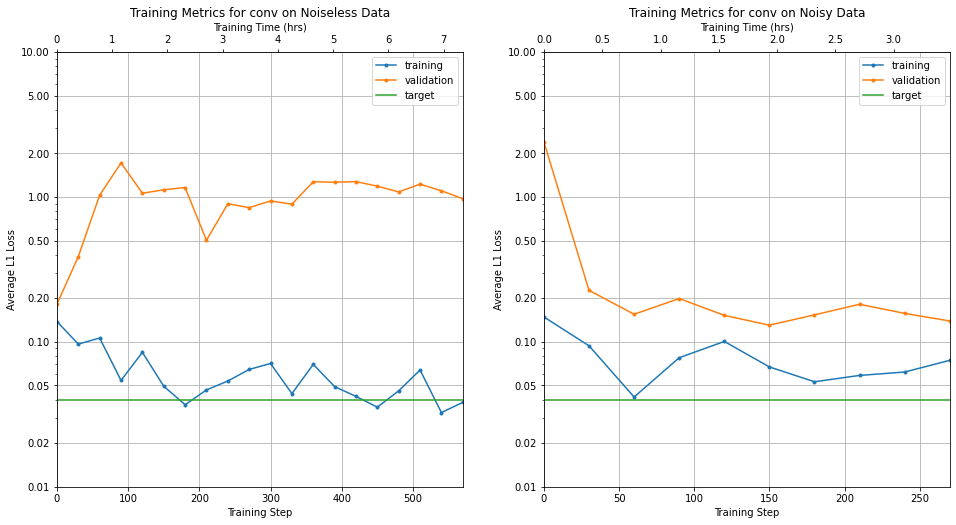

In [225]:
plot_metrics("conv")

Minimum Loss on Training Set During Noiseless Stage: 0.02568395435810089
Minimum Loss on Validation Set During Noiseless Stage: 0.1842850185930729
Minimum Loss on Training Set During Noisy Stage: 0.04328007251024246
Minimum Loss on Validation Set During Noisy Stage: 0.15347876772284508
Time per Training Step During Noiseless Stage: 47.318723888397216 seconds
Time per Training Step During Noisy Stage: 47.51106190284093 seconds


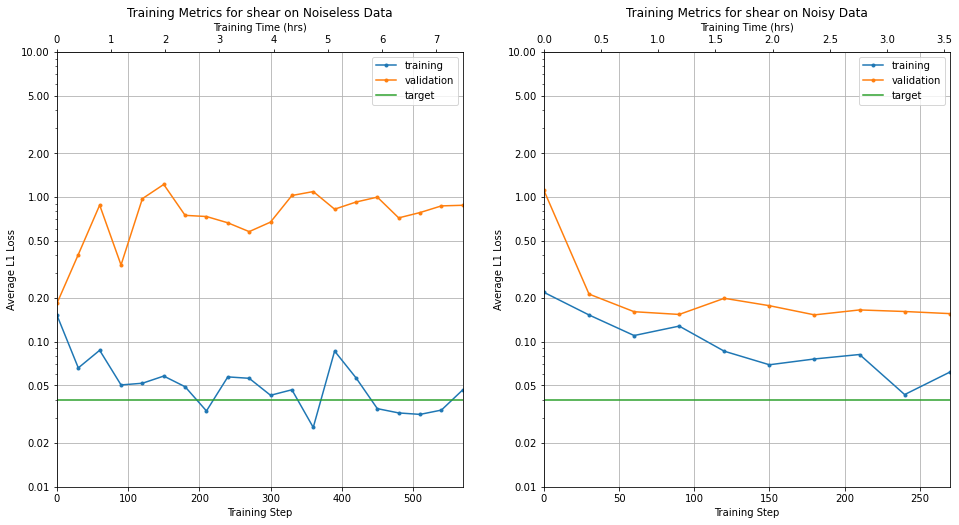

In [226]:
plot_metrics("shear")

Minimum Loss on Training Set During Noiseless Stage: 0.020190514624118805
Minimum Loss on Validation Set During Noiseless Stage: 2.101491391658783
Minimum Loss on Training Set During Noisy Stage: 0.0430864542722702
Minimum Loss on Validation Set During Noisy Stage: 0.18612020835280418
Time per Training Step During Noiseless Stage: 44.99229112704595 seconds
Time per Training Step During Noisy Stage: 44.3794251592954 seconds


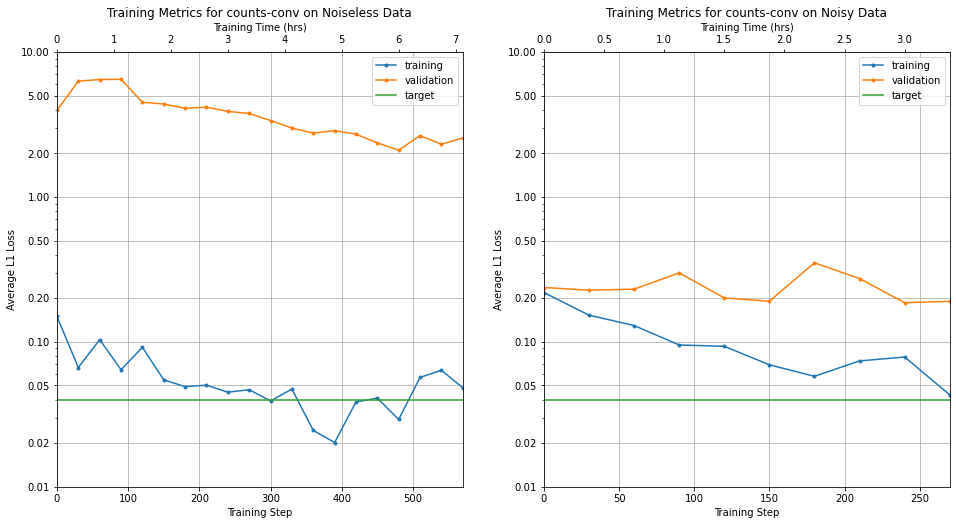

In [227]:
plot_metrics("counts-conv")

In [228]:
base_metrics_1 = np.load("../metrics/vdata1-counts-base-metrics-1.npz")
base_metrics_2 = np.load("../metrics/vdata1-counts-base-metrics-2.npz")


order = 2
nmaps = 10
batch_size = 16
eval_frequency = 12 * order * order * nmaps / batch_size

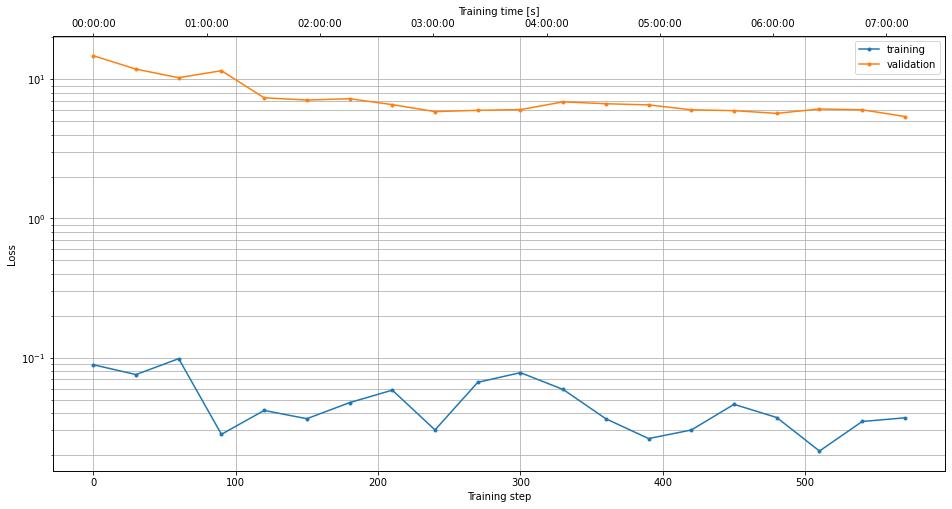

In [229]:
plot_loss(base_metrics_1["ltrain"], base_metrics_1["lval"], base_metrics_1["t"], eval_frequency)

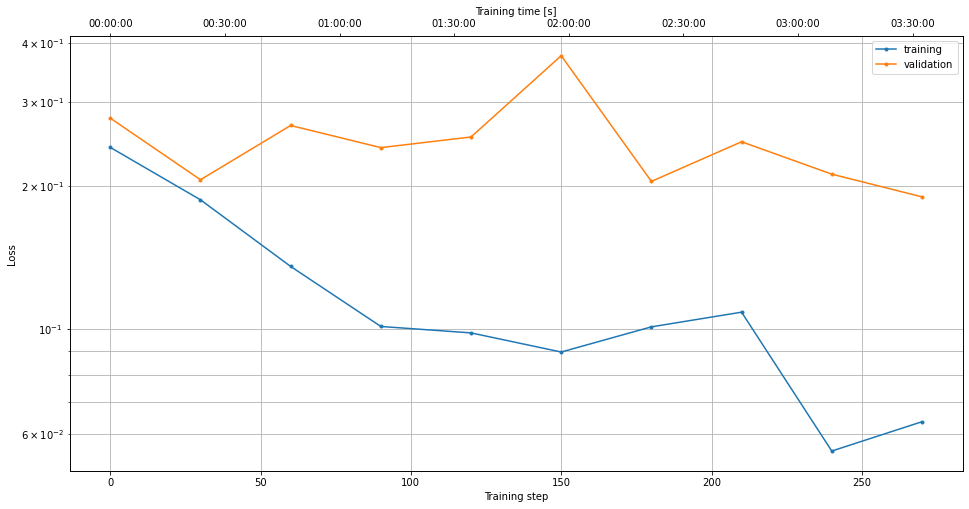

In [230]:
plot_loss(base_metrics_2["ltrain"], base_metrics_2["lval"], base_metrics_2["t"], eval_frequency)

In [231]:
order_metrics_1 = np.load("../metrics/vdata1-counts-order-metrics-1.npz")
order_metrics_2 = np.load("../metrics/vdata1-counts-order-metrics-2.npz")


order = 4
nmaps = 10
batch_size = 64
eval_frequency = 12 * order * order * nmaps / batch_size

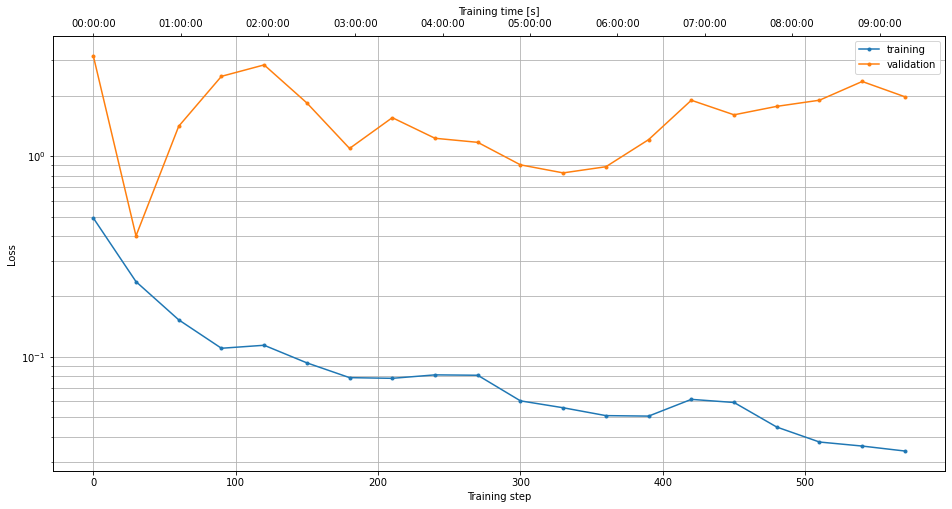

In [232]:
plot_loss(order_metrics_1["ltrain"], order_metrics_1["lval"], order_metrics_1["t"], eval_frequency)

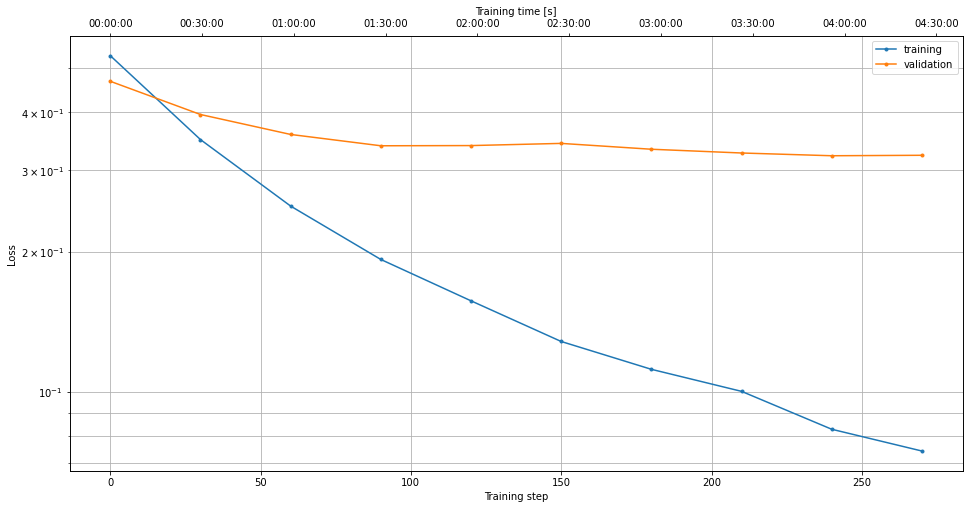

In [233]:
plot_loss(order_metrics_2["ltrain"], order_metrics_2["lval"], order_metrics_2["t"], eval_frequency)

In [234]:
full_metrics_1 = np.load("../metrics/vdata1-counts-full-metrics-1.npz")
full_metrics_2 = np.load("../metrics/vdata1-counts-full-metrics-2.npz")


order = 2
nmaps = 20
batch_size = 64
eval_frequency = 12 * order * order * nmaps / batch_size

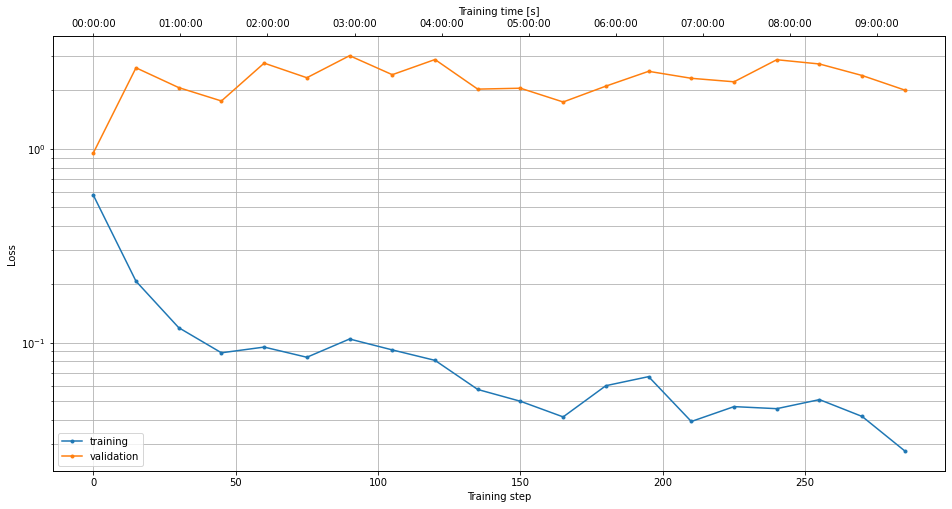

In [235]:
plot_loss(full_metrics_1["ltrain"], full_metrics_1["lval"], full_metrics_1["t"], eval_frequency)

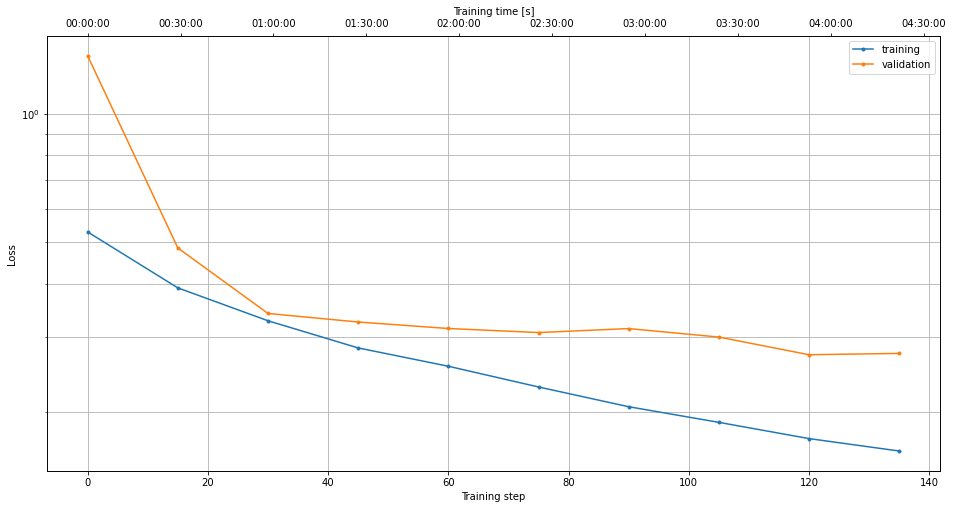

In [236]:
plot_loss(full_metrics_2["ltrain"], full_metrics_2["lval"], full_metrics_2["t"], eval_frequency)

In [237]:
conv_metrics_1 = np.load("../metrics/vdata1-conv-metrics-1.npz")
conv_metrics_2 = np.load("../metrics/vdata1-conv-metrics-2.npz")


order = 2
nmaps = 10
batch_size = 16
eval_frequency = 12 * order * order * nmaps / batch_size

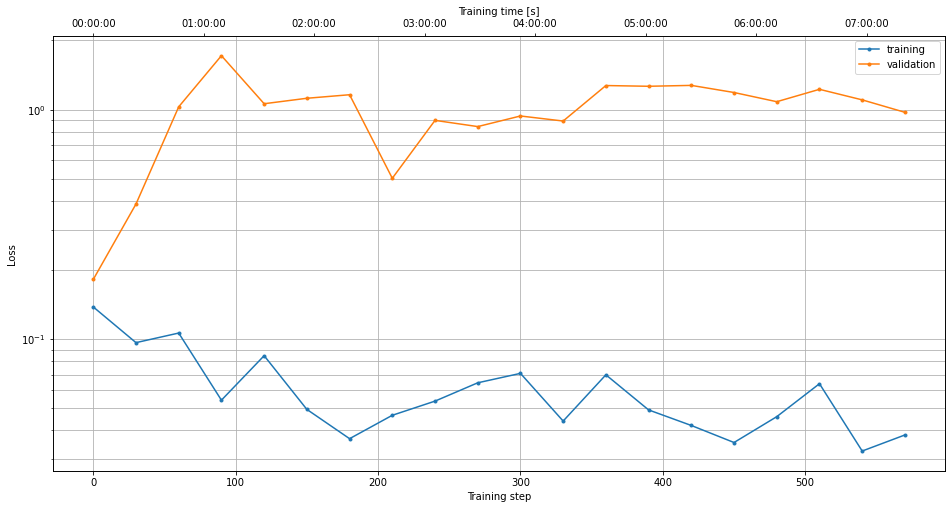

In [238]:
plot_loss(conv_metrics_1["ltrain"], conv_metrics_1["lval"], conv_metrics_1["t"], eval_frequency)

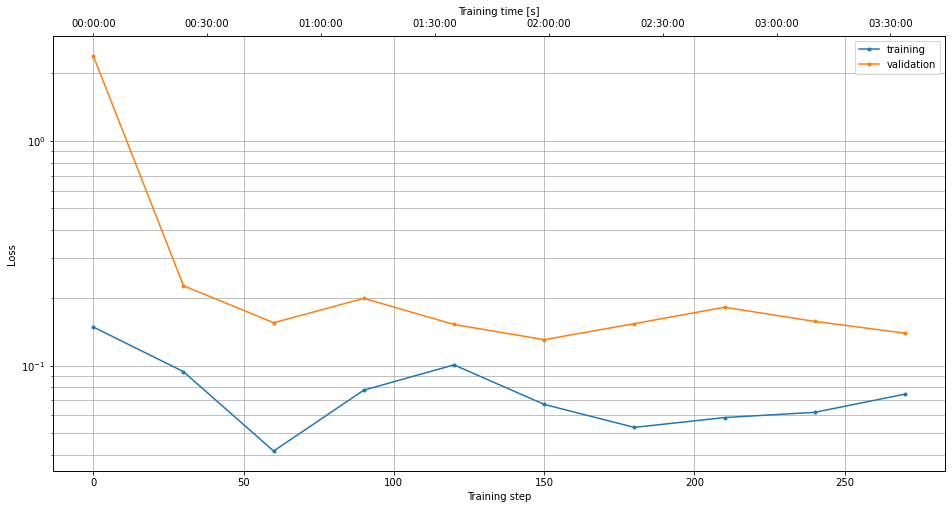

In [239]:
plot_loss(conv_metrics_2["ltrain"], conv_metrics_2["lval"], conv_metrics_2["t"], eval_frequency)

In [240]:
shear_metrics_1 = np.load("../metrics/vdata1-shear-metrics-1.npz")
shear_metrics_2 = np.load("../metrics/vdata1-shear-metrics-2.npz")


order = 2
nmaps = 10
batch_size = 16
eval_frequency = 12 * order * order * nmaps / batch_size

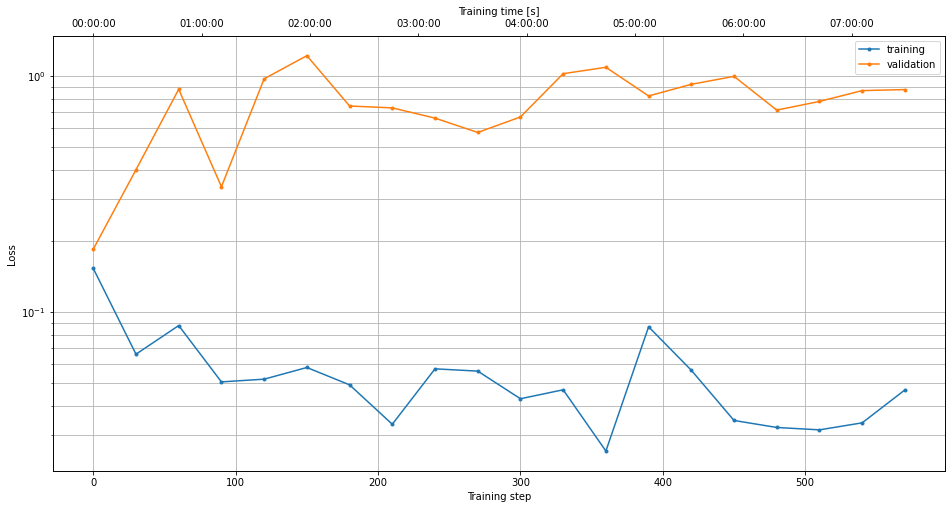

In [241]:
plot_loss(shear_metrics_1["ltrain"], shear_metrics_1["lval"], shear_metrics_1["t"], eval_frequency)